In [1]:
# from a 500x500 grid create 100 50x50 grid
# then write a function to find if a deposit falls in this grid
# name grid stampId_row_column



In [2]:
# first get the stamp with the most ammount of deposits and do some analysis

In [3]:
# once the stamps are split. analyse each group commodity to find some patterns or signatures

In [4]:

import numpy as np
import os
import rasterio
import geopandas as gpd
import pandas as pd
from collections import defaultdict
from pathlib import Path
from shapely.geometry import Point
from shapely.geometry import Polygon
from pathlib import Path
import rasterio
%matplotlib inline
import matplotlib.pyplot as plt
from rasterio.windows import Window
from explore_australia.reprojection import reproject
from shapely.geometry import Point

from explore_australia.utilities import omerc_projection
from explore_australia.geometry import make_stamp

from rasterio.mask import mask
from numpy import nan, nanquantile

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# set path of the train dataset
trainpath = '/Users/pedrojunqueira/Desktop/train'

In [6]:
# create a list with the id of the stamps
trainids = os.listdir(trainpath)

In [7]:
# import stamp geodataframe path
stamps_data = '../data/stamp_locations.geo.json'

In [8]:
# create geodataframe objects
stamps = gpd.read_file(stamps_data)

In [9]:
stamps.head()

,id,age,comment,commodities_string,original_id,latitude,longitude,name,offset_azimuth,offset_distance,rotation,centre_longitude,centre_latitude,local_projection,stratification_label,commodity_string,geometry
0,57941438,Late Ordovician,Late Ordovician-Silurian,Au;Cu,333286.0,-36.115388,147.091253,Bethanga,303.344109,2.842514,54.786230,147.063229,-36.103610,+proj=omerc +lat_0=-36.10360962430914 +lonc=14...,Cu,Au;Cu,"POLYGON ((147.25693 -36.07651, 147.09679 -36.2..."
1,21418444,Late Palaeozoic,nan,Ag;Zn;Pb,333287.0,-18.710841,125.968020,Cadjebut,172.255972,0.258271,33.878547,125.968195,-18.713172,+proj=omerc +lat_0=-18.713172195007903 +lonc=1...,Pb,Ag;Pb;Zn,"POLYGON ((126.13276 -18.74376, 125.93585 -18.8..."
2,28504073,Tertiary,nan,U,333288.0,-31.740950,140.662364,Honeymoon,198.924483,5.095457,39.470302,140.647504,-31.785548,+proj=omerc +lat_0=-31.785548449603528 +lonc=1...,Cu,Au;Cu;Mo;U,"POLYGON ((140.83354 -31.80077, 140.62952 -31.9..."
3,09892066,Precambrian,nan,Fe,333289.0,-22.635456,118.138599,Marandoo,300.876698,0.669953,46.064688,118.133423,-22.631687,+proj=omerc +lat_0=-22.631687090092235 +lonc=1...,Fe,Fe,"POLYGON ((118.30548 -22.62868, 118.13666 -22.7..."
4,46206860,Neoproterozoic,coincides with NNW trending transcontinental g...,Ag;Cu;Co,333290.0,-31.447091,137.149981,Mount Gunson,16.670195,4.225797,37.180881,137.161769,-31.409967,+proj=omerc +lat_0=-31.409967128089512 +lonc=1...,Cu,Ag;Co;Cu,"POLYGON ((137.34620 -31.43149, 137.13646 -31.5..."


In [13]:
trainids[0]

'82771002'

In [14]:
commodity = 'commodities.csv'

In [15]:
os.path.join(trainpath,trainids[0],commodity)

'/Users/pedrojunqueira/Desktop/train/82771002/commodities.csv'

In [16]:
';'.join(pd.read_csv(os.path.join(trainpath,trainids[0],commodity))['commodity'].tolist())

'Fe;Ag;Zn;Cu;Pb;Au'

In [17]:
# check all stamps on the train set to find the stamp with most amount fo deposits
stamp_deposits = defaultdict(list)
for i in trainids:
    df = pd.read_csv(os.path.join(trainpath,i,commodity))
    stamp_deposits['id'].append(i)
    stamp_deposits['deposits'].append(df.shape[0])
    stamp_deposits['commodities'].append(';'.join(df['commodity'].tolist()))
  
    

In [18]:
number_deposits = pd.DataFrame(stamp_deposits)

In [19]:
number_deposits

,id,deposits,commodities
0,82771002,2,Fe;Ag;Zn;Cu;Pb;Au
1,23922457,1,U
2,00613312,2,Au;Au
3,30527645,1,Mn
4,51982094,0,
...,...,...,...
1858,47763108,4,Cu;Zn;Pb;Mn;Mn
1859,76723666,1,Mn
1860,42884730,1,Cu
1861,96499931,0,


In [20]:
number_deposits.sort_values(by='deposits',ascending=False)

,id,deposits,commodities
1202,54334295,36,Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;A...
1734,03441547,30,Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;A...
1695,61615669,28,Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;A...
45,28659318,26,Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;A...
1618,62179344,25,Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;Au;A...
...,...,...,...
883,33829925,0,
892,08398059,0,
893,14476770,0,
899,22144538,0,


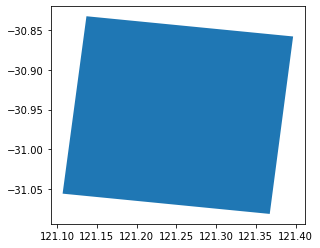

In [21]:
# plot the most busy stamp
stamps[stamps['id']=='54334295'].plot();

In [22]:
# Load up deposits of stamp

df = pd.read_csv(os.path.join(trainpath,'54334295',commodity))


In [23]:
df['geometry'] = list(zip(df.x, df.y))
df['geometry'] = df['geometry'].apply(Point)
df = gpd.GeoDataFrame(df)

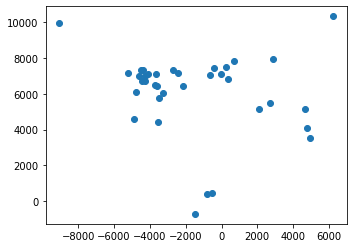

In [24]:
df.plot()

In [25]:
# now load one raster file of this stamp say bouger_gravity anomaly
mag_tif = os.path.join(trainpath,'54334295','geophysics/gravity/bouger_gravity_anomaly.tif')

with rasterio.open(mag_tif, 'r') as src:
    meta = src.meta
    data = src.read(1)

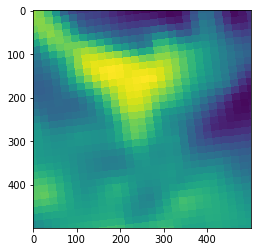

In [26]:
plt.imshow(data);

In [27]:
data.dtype

dtype('float32')

In [28]:
# use Rasterio Window function to slice the tiff file in 100 tiles 50x50 
# To certify check if some of pixels of all tiles is equal the sum of original image


height = 500
width = 500
tilesheight = 50
tileswidth = 50

rows = range(int(height/tilesheight))
cols = range(int(width/tileswidth))

count= 0
sums = []
for i in rows:
    for j in cols:
        with rasterio.open(mag_tif, 'r') as src:
            w = src.read(1, window=Window(i*tileswidth, j*tilesheight, 50, 50))
            #print(f'col_off: {i*tileswidth}, row_off: {j*tilesheight}')
            sums.append(w.sum())
        
        

In [29]:
sum(sums)

-137460279.5625

In [30]:
data.sum() # close enough

-137460290.0

In [31]:
# save tiles data in a list

height = 500
width = 500
tilesheight = 50
tileswidth = 50

rows = range(int(height/tilesheight))
cols = range(int(width/tileswidth))

count= 0
tiles = []
windows = []
for i in rows:
    for j in cols:
        with rasterio.open(mag_tif, 'r') as src:
            w = src.read(1, window=Window(i*tileswidth, j*tilesheight, 50, 50))
            col_off = i*tileswidth
            row_off = j*tilesheight
            windows.append((col_off,row_off))
            #print(f'col_off: {i*tileswidth}, row_off: {j*tilesheight}')
            tiles.append(w)
        
        

In [32]:
len(tiles) # 100 tiles 50x50 each 

100

In [33]:
#windows

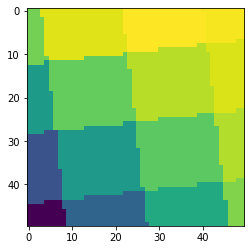

In [34]:
plt.imshow(tiles[33]); # random tile

In [35]:
# reconstruct image aka stich tiles back together
with rasterio.open(
        'example.tif', "w+",
        driver='GTiff', width=500, height=500, count=1,
        dtype=tiles[1].dtype) as dst:
    for tile, window in zip(tiles,windows):
        col_off , row_off = window
        dst.write(tile, window=Window(col_off, row_off, 50, 50), indexes=1)
    d = dst.read(1)
    
    

/Users/pedrojunqueira/anaconda3/envs/exploration/lib/python3.7/site-packages/rasterio/__init__.py:225: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  **kwargs)


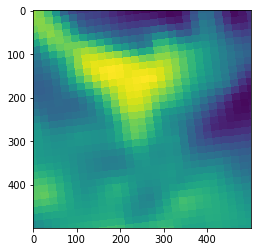

In [36]:
plt.imshow(d);

In [37]:
# import sticked together image
with rasterio.open('example.tif', 'r') as src:
    meta_ex = src.meta
    data_ex = src.read(1)

/Users/pedrojunqueira/anaconda3/envs/exploration/lib/python3.7/site-packages/rasterio/__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


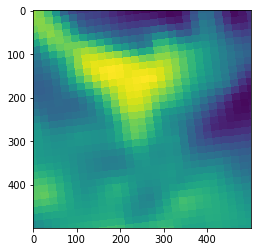

In [38]:
plt.imshow(data_ex);

In [39]:
# import all depositis to clip a stamp

data = Path('../data/deposit_locations.geo.json')
deposits = gpd.read_file(data)
deposits.head()

,age,comment,commodities_string,id,latitude,longitude,name,geometry
0,Late Ordovician,Late Ordovician-Silurian,Au;Cu,333286,-36.115388,147.091253,Bethanga,POINT (147.09125 -36.11539)
1,Late Palaeozoic,nan,Ag;Zn;Pb,333287,-18.710841,125.968020,Cadjebut,POINT (125.96802 -18.71084)
2,Tertiary,nan,U,333288,-31.740950,140.662364,Honeymoon,POINT (140.66236 -31.74095)
3,Precambrian,nan,Fe,333289,-22.635456,118.138599,Marandoo,POINT (118.13860 -22.63546)
4,Neoproterozoic,coincides with NNW trending transcontinental g...,Ag;Cu;Co,333290,-31.447091,137.149981,Mount Gunson,POINT (137.14998 -31.44709)


In [40]:
def clip_out(stamp, to_crs, crs='epsg:4326'):
    "Clip out the area given by the stamp polygon"
    # We first subset to the set of units that intersects with the bounding box, then generate the intersection
    stamp_reproj = reproject(stamp, crs, deposits.crs)
    subset = deposits[deposits.intersects(stamp_reproj)]
    clipped = subset.copy()
    clipped = clipped.intersection(stamp_reproj).to_crs(to_crs)
    return clipped

In [41]:
stamps.loc[stamps['id']=='54334295',['centre_longitude','centre_latitude','rotation']]

,centre_longitude,centre_latitude,rotation
352,121.251981,-30.956905,83.489438


In [42]:
# Make a rotated box to pull data from
centre = Point(121.251981, -30.956905)
angle = 83.489438
stamp = make_stamp(centre, angle)

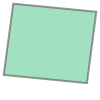

In [43]:
stamp

In [44]:
stamp_reproj = reproject(stamp, 'epsg:4326', deposits.crs)
subset = deposits[deposits.intersects(stamp_reproj)]

In [45]:
subset.loc[:,['age','commodities_string']]

,age,commodities_string
116,Archean,Au
328,Archean,Au
332,None,Au
380,Archean,Au
405,Archaean,Au
595,None,Au
657,Archean,Au
756,Archaean,Au
877,Archaean,Au
953,Archaean,Au


In [46]:
# # Clip the data and reproject to a locally aligned grid in m
projection = omerc_projection(centre, angle)

clipped = clip_out(stamp, crs='epsg:4326', to_crs=projection)



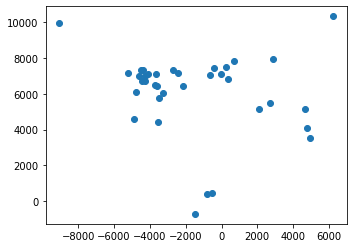

In [47]:
clipped.plot(); # how to divide in 100 boxes and find what point fall in what box?



In [48]:
clipped

116     POINT (-4473.563 7303.392)
328     POINT (-3485.414 5791.956)
332     POINT (-3527.788 4430.851)
380      POINT (-438.241 7439.886)
405       POINT (-523.953 443.360)
595     POINT (-4383.552 7332.960)
657     POINT (-3245.012 6031.064)
756       POINT (356.167 6838.575)
877      POINT (2712.252 5463.877)
953     POINT (-4293.321 6997.205)
1003     POINT (2893.360 7923.620)
1091     POINT (2100.601 5153.284)
1269      POINT (713.051 7812.564)
1344    POINT (-2415.402 7164.767)
1393     POINT (4674.358 5169.166)
1472    POINT (-5235.861 7138.925)
1513    POINT (-2138.818 6407.995)
1573      POINT (250.107 7470.837)
1653     POINT (4793.722 4100.652)
1924    POINT (6235.162 10333.514)
2087     POINT (-629.220 7062.102)
2132    POINT (-9065.331 9966.637)
2269    POINT (-4766.884 6125.648)
2316    POINT (-4294.769 6718.223)
2317    POINT (-3658.837 7108.523)
2573    POINT (-1502.782 -711.786)
2605     POINT (4945.154 3526.054)
2752    POINT (-4119.151 7132.580)
2753    POINT (-2702

In [49]:
randpoint = clipped[116]

In [50]:
# import raster to mask depositis
mag_tif = os.path.join(trainpath,'54334295','geophysics/gravity/bouger_gravity_anomaly.tif')

with rasterio.open(mag_tif, 'r') as src:
    data_ex = src.read(1)
    out_image, _ = mask(src, [randpoint], nodata=nan)

    

In [51]:
out_image

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)

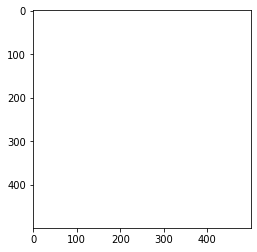

In [52]:
plt.imshow(out_image[0]);

In [53]:
type(out_image[0])

numpy.ndarray

In [54]:
out_image[0].sum() # cannot mask the points.... 


nan

The above method to mask have not worket and I was using points and it may be too small to be able to mask
One option is to find a buffer and the try this technique again.
What I will try to attemp is to slice the box in 100 shape files to loop and find which geofisics tile has deposits

In [55]:
# create a range from -12500 to 12500 which is the x coordinates of the stamp in meters 
start = -12500
xs = [start]

for i in range(10):
    start+= 2500
    xs.append(start)

In [56]:
# create a range from -12500 to 12500 which is the y coordinates of the stamp in meters 
start = 12500
ys = [start]

for i in range(10):
    start -= 2500
    ys.append(start)

In [57]:
print(xs)
print(ys)

[-12500, -10000, -7500, -5000, -2500, 0, 2500, 5000, 7500, 10000, 12500]
[12500, 10000, 7500, 5000, 2500, 0, -2500, -5000, -7500, -10000, -12500]


In [58]:
# create a list of tuples of the coors of stamp boxes from bottom to top from left to right
coords = list()
for i in xs:
    for j in ys:
        coords.append((i,j))

In [59]:
coords

[(-12500, 12500),
 (-12500, 10000),
 (-12500, 7500),
 (-12500, 5000),
 (-12500, 2500),
 (-12500, 0),
 (-12500, -2500),
 (-12500, -5000),
 (-12500, -7500),
 (-12500, -10000),
 (-12500, -12500),
 (-10000, 12500),
 (-10000, 10000),
 (-10000, 7500),
 (-10000, 5000),
 (-10000, 2500),
 (-10000, 0),
 (-10000, -2500),
 (-10000, -5000),
 (-10000, -7500),
 (-10000, -10000),
 (-10000, -12500),
 (-7500, 12500),
 (-7500, 10000),
 (-7500, 7500),
 (-7500, 5000),
 (-7500, 2500),
 (-7500, 0),
 (-7500, -2500),
 (-7500, -5000),
 (-7500, -7500),
 (-7500, -10000),
 (-7500, -12500),
 (-5000, 12500),
 (-5000, 10000),
 (-5000, 7500),
 (-5000, 5000),
 (-5000, 2500),
 (-5000, 0),
 (-5000, -2500),
 (-5000, -5000),
 (-5000, -7500),
 (-5000, -10000),
 (-5000, -12500),
 (-2500, 12500),
 (-2500, 10000),
 (-2500, 7500),
 (-2500, 5000),
 (-2500, 2500),
 (-2500, 0),
 (-2500, -2500),
 (-2500, -5000),
 (-2500, -7500),
 (-2500, -10000),
 (-2500, -12500),
 (0, 12500),
 (0, 10000),
 (0, 7500),
 (0, 5000),
 (0, 2500),
 (0, 0

In [60]:
# create the 100 shape files
nobox = [10,21,32,43,54,65,76,87,98]
boxes = []
for i in range(109):
    if i in nobox:
        continue
    else:
        #print([coords[i+1], coords[i+12], coords[i+11], coords[i]])
        #box = Polygon([(minx, miny), (maxx,miny), (maxx, maxy), (minx,maxy)])
        box = Polygon([coords[i+1], coords[i+12], coords[i+11], coords[i]])
        boxes.append(box)

    

In [61]:
box.bounds #Its x-y bounding box is a (minx, miny, maxx, maxy) tuple.

(10000.0, -12500.0, 12500.0, -10000.0)

In [62]:
len(boxes) # all 100 boxes

100

In [63]:
boxes[0].bounds # top left box

(-12500.0, 10000.0, -10000.0, 12500.0)

In [64]:
boxes[99].bounds # bottom right box

(10000.0, -12500.0, 12500.0, -10000.0)

The loop goes from top to bottom from left to right

In [65]:
# clipped.within(box)

boxes_with_deposit = []
box_number = []
for i, box in enumerate(boxes):
    if clipped.within(box).sum():
        print(f'in box {box.bounds} there are {clipped.within(box).sum()} deposits')
        boxes_with_deposit.append(box)
        box_number.append(i+1)

in box (-10000.0, 7500.0, -7500.0, 10000.0) there are 1 deposits
in box (-7500.0, 5000.0, -5000.0, 7500.0) there are 1 deposits
in box (-5000.0, 5000.0, -2500.0, 7500.0) there are 14 deposits
in box (-5000.0, 2500.0, -2500.0, 5000.0) there are 2 deposits
in box (-2500.0, 5000.0, 0.0, 7500.0) there are 5 deposits
in box (-2500.0, 0.0, 0.0, 2500.0) there are 2 deposits
in box (-2500.0, -2500.0, 0.0, 0.0) there are 1 deposits
in box (0.0, 7500.0, 2500.0, 10000.0) there are 1 deposits
in box (0.0, 5000.0, 2500.0, 7500.0) there are 3 deposits
in box (2500.0, 7500.0, 5000.0, 10000.0) there are 1 deposits
in box (2500.0, 5000.0, 5000.0, 7500.0) there are 2 deposits
in box (2500.0, 2500.0, 5000.0, 5000.0) there are 2 deposits
in box (5000.0, 10000.0, 7500.0, 12500.0) there are 1 deposits


In [66]:
boxes_with_deposit

In [67]:
box_number

[12, 23, 33, 34, 43, 45, 46, 52, 53, 62, 63, 64, 71]

In [68]:
boxesframe = gpd.GeoDataFrame(geometry=boxes_with_deposit)

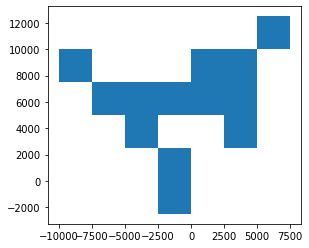

In [69]:
boxesframe.plot()

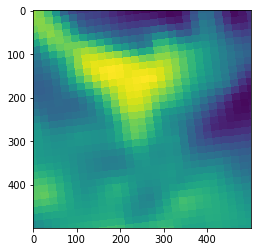

In [70]:
plt.imshow(data_ex);

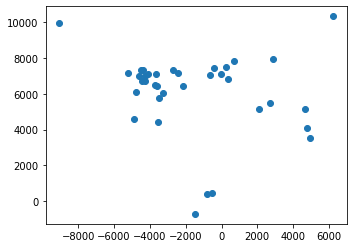

In [71]:
clipped.plot();

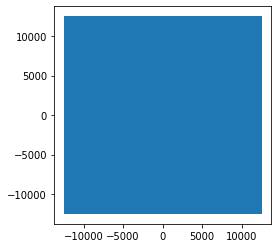

In [72]:
allboxes= gpd.GeoDataFrame(geometry=boxes)
allboxes.plot()

In [73]:

for i, box in enumerate(boxes):
    print(f'in box {i+1} there are {clipped.within(box).sum()} deposits')
    

in box 1 there are 0 deposits
in box 2 there are 0 deposits
in box 3 there are 0 deposits
in box 4 there are 0 deposits
in box 5 there are 0 deposits
in box 6 there are 0 deposits
in box 7 there are 0 deposits
in box 8 there are 0 deposits
in box 9 there are 0 deposits
in box 10 there are 0 deposits
in box 11 there are 0 deposits
in box 12 there are 1 deposits
in box 13 there are 0 deposits
in box 14 there are 0 deposits
in box 15 there are 0 deposits
in box 16 there are 0 deposits
in box 17 there are 0 deposits
in box 18 there are 0 deposits
in box 19 there are 0 deposits
in box 20 there are 0 deposits
in box 21 there are 0 deposits
in box 22 there are 0 deposits
in box 23 there are 1 deposits
in box 24 there are 0 deposits
in box 25 there are 0 deposits
in box 26 there are 0 deposits
in box 27 there are 0 deposits
in box 28 there are 0 deposits
in box 29 there are 0 deposits
in box 30 there are 0 deposits
in box 31 there are 0 deposits
in box 32 there are 0 deposits
in box 33 there a

In [74]:
# reconstruct image aka stich tiles back together only tiles with deposit
with rasterio.open(
        'example_cliped.tif', "w+",
        driver='GTiff', width=500, height=500, count=1,
        dtype=tiles[1].dtype) as dst:
    for i, (tile, window) in enumerate(zip(tiles,windows)):
        if i in box_number:
            col_off , row_off = window
            dst.write(tile, window=Window(col_off, row_off, 50, 50), indexes=1)
    d = dst.read(1)

    

/Users/pedrojunqueira/anaconda3/envs/exploration/lib/python3.7/site-packages/rasterio/__init__.py:225: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  **kwargs)


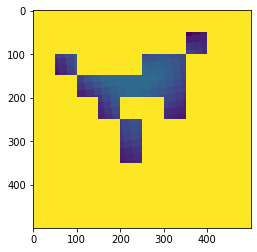

In [75]:
plt.imshow(d);

In [76]:
len(tiles)

100

In [77]:
# reconstruct image aka stich tiles back together only tiles with deposit
with rasterio.open(
        'example_not_cliped.tif', "w+",
        driver='GTiff', width=500, height=500, count=1,
        dtype=tiles[1].dtype) as dst:
    for i, (tile, window) in enumerate(zip(tiles,windows)):
        if i not in box_number:
            col_off , row_off = window
            dst.write(tile, window=Window(col_off, row_off, 50, 50), indexes=1)
    d = dst.read(1)


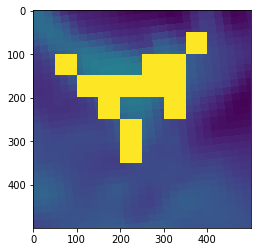

In [78]:
plt.imshow(d);

In [79]:
stamp_id = '54334295'
commodity = 'Au'
stamp_map = dict()

for i, box in enumerate(boxes):
    if clipped.within(box).sum() > 0 :
        stamp_map[f'{stamp_id}_{i+1}'] = (i, commodity, clipped.within(box).sum())
    else:
        stamp_map[f'{stamp_id}_{i+1}'] = (i, 'None', clipped.within(box).sum())
        
print(len(stamp_map))
stamp_map

100


{'54334295_1': (0, 'None', 0),
 '54334295_2': (1, 'None', 0),
 '54334295_3': (2, 'None', 0),
 '54334295_4': (3, 'None', 0),
 '54334295_5': (4, 'None', 0),
 '54334295_6': (5, 'None', 0),
 '54334295_7': (6, 'None', 0),
 '54334295_8': (7, 'None', 0),
 '54334295_9': (8, 'None', 0),
 '54334295_10': (9, 'None', 0),
 '54334295_11': (10, 'None', 0),
 '54334295_12': (11, 'Au', 1),
 '54334295_13': (12, 'None', 0),
 '54334295_14': (13, 'None', 0),
 '54334295_15': (14, 'None', 0),
 '54334295_16': (15, 'None', 0),
 '54334295_17': (16, 'None', 0),
 '54334295_18': (17, 'None', 0),
 '54334295_19': (18, 'None', 0),
 '54334295_20': (19, 'None', 0),
 '54334295_21': (20, 'None', 0),
 '54334295_22': (21, 'None', 0),
 '54334295_23': (22, 'Au', 1),
 '54334295_24': (23, 'None', 0),
 '54334295_25': (24, 'None', 0),
 '54334295_26': (25, 'None', 0),
 '54334295_27': (26, 'None', 0),
 '54334295_28': (27, 'None', 0),
 '54334295_29': (28, 'None', 0),
 '54334295_30': (29, 'None', 0),
 '54334295_31': (30, 'None', 0),


In [80]:
box_plot_data = defaultdict(list)

for key, value in stamp_map.items():
    box_plot_data['tile_id'].append(key)
    i, commodity, depos = value
    box_plot_data['commodity'].append(commodity)
    box_plot_data['n_deposits'].append(depos)
    box_plot_data['mean'].append(tiles[i].mean())
    
    
    



In [81]:
df = pd.DataFrame(box_plot_data)

In [82]:
df

,tile_id,commodity,n_deposits,mean
0,54334295_1,None,0,-470.595764
1,54334295_2,None,0,-501.907257
2,54334295_3,None,0,-580.611206
3,54334295_4,None,0,-609.089111
4,54334295_5,None,0,-599.758179
...,...,...,...,...
95,54334295_96,None,0,-667.312683
96,54334295_97,None,0,-616.859619
97,54334295_98,None,0,-581.369568
98,54334295_99,None,0,-547.480774


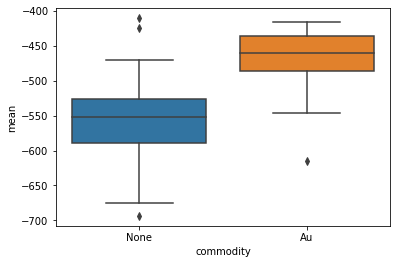

In [83]:
sns.boxplot(y='mean',x='commodity',data=df);